# Motorcycle Sales Analysis

- You work in the accounting department of a company that sells motorcycle parts. 
- The company operates three warehouses in a large metropolitan area. 
- You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. 
- Your colleague wants to capture sales by payment method and also needs to know the average unit price for each product line
- The dataset was gotten from Datacamp

# The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [2]:
# Importing modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

#plt.style.use('seaborn-white')


In [3]:
 
# Reading in the sales data

sales = pd.read_csv(r'C:\Users\iphy2\Downloads\Python Files2\sales_data.csv', parse_dates=['date'] )




In [4]:
# Take a look at the first datapoints
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [6]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [7]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Checking for null values

In [8]:
sales.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [9]:
# Extracting Day and Month name from date

sales["Week_day"]=sales["date"].dt.day_name()
sales["Month"]=sales["date"].dt.month_name()

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
 8   Week_day      1000 non-null   object        
 9   Month         1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 78.2+ KB


### Defining function for plotting Bar Plot

In [14]:
def plot_barPlot(data,x,y,title,xlabel,ylabel):
    '''Plots bar plot'''
    plt.figure(figsize=(12,8))
    splot=sns.barplot(data=data,x=x,y=y,ci=0)

    for p in splot.patches:
        splot.annotate(round(p.get_height(),2),#text that you want to write on top
                       (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                       ha = 'center', va = 'center',# alignment of the text
                       xytext = (0, 10),# distance of text from top of the patch
                       textcoords = 'offset points') #do not change and remove it
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Defining function for plotting Heat

In [15]:
def plot_heatmap(data,xlabel,ylabel,title=""):
    '''Plot heat map'''
    plt.figure(figsize=(12,8))
    sns.heatmap(data=data,cmap="binary",annot=True, fmt='g')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()



## Correlations

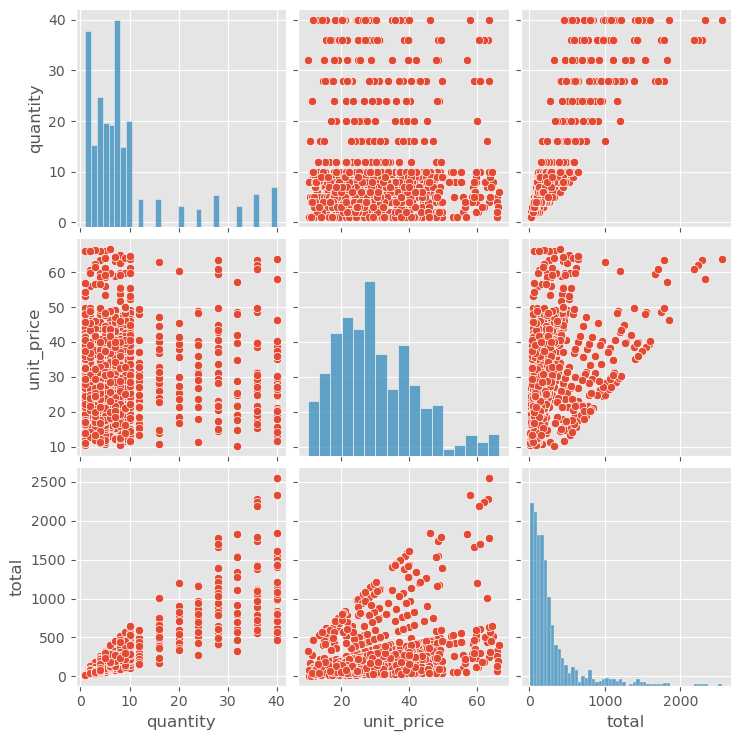

In [16]:
# Getting numeric columns in list and checking correlation
columns=list()
for col in sales:
    if(sales[col].dtype!="object" and sales[col].dtype!="datetime64[ns]"):
        columns.append(col)

sns.pairplot(data=sales,x_vars=columns)
plt.show()

### Observation

- "Total" and "Quantity" are highly correlated.
- "Total" and "Unit Price" are highly correlated.

In [17]:

## Total sales for each payment method

total_sales_foreach_payement=(sales.groupby("payment")["total"].sum().reset_index().sort_values('total'))
total_sales_foreach_payement

,payment,total
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


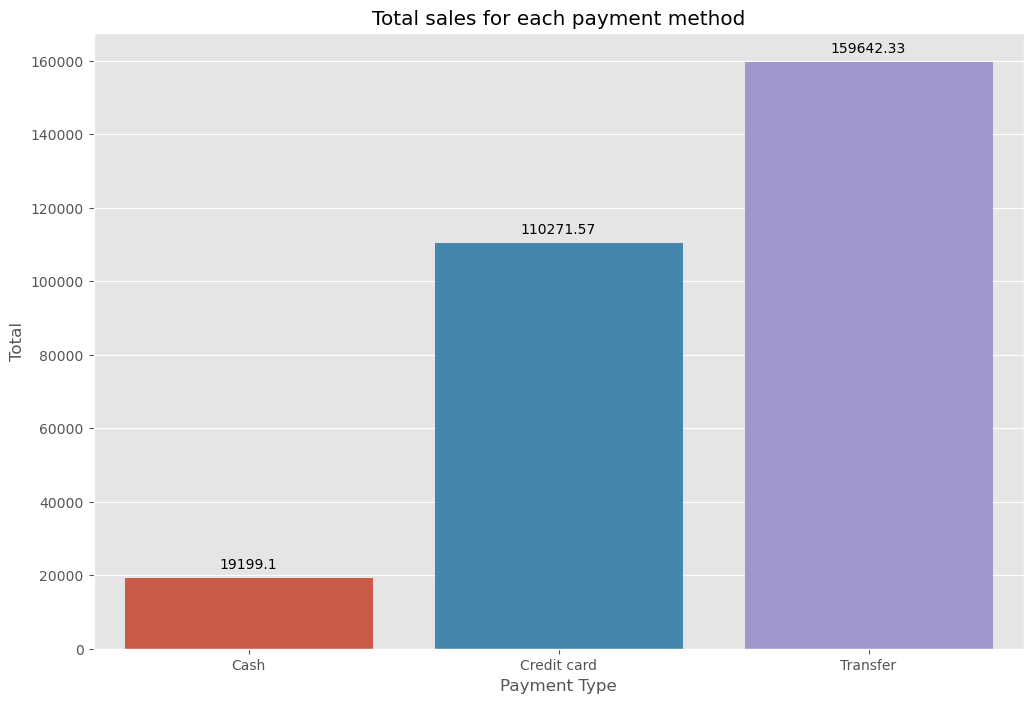

In [18]:
plot_barPlot(total_sales_foreach_payement,"payment","total","Total sales for each payment method","Payment Type","Total")

### Observation

- Total Sales and for Payment type **"Transfer"** is the **highest**.


In [19]:
# Average unit price for each Product line

Avg_unit_price_product_line=(sales.groupby(["product_line"])[["unit_price"]].mean().reset_index().sort_values('unit_price'))
Avg_unit_price_product_line

,product_line,unit_price
0,Breaking system,17.740522
4,Miscellaneous,22.810738
1,Electrical system,25.585130
5,Suspension & traction,33.969868
3,Frame & body,42.832229
2,Engine,60.091803


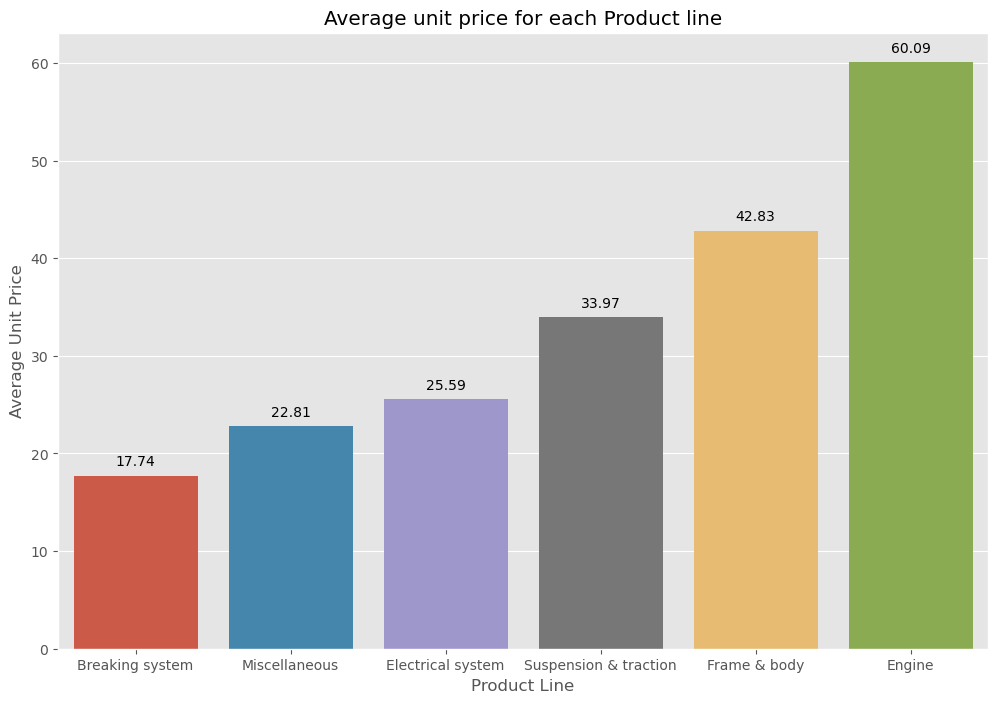

In [20]:
plot_barPlot(Avg_unit_price_product_line,"product_line","unit_price","Average unit price for each Product line","Product Line","Average Unit Price")

### Observation

- Average unit price for **Engine** product line is the **highest**.
- Average unit price for **Breaking System** product line is the **lowest**.


In [21]:
# Average purchase value by client type

Avg_purchase_value_client_type=(sales.groupby(["client_type"])[["total"]].mean().reset_index().sort_values('total'))
Avg_purchase_value_client_type

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


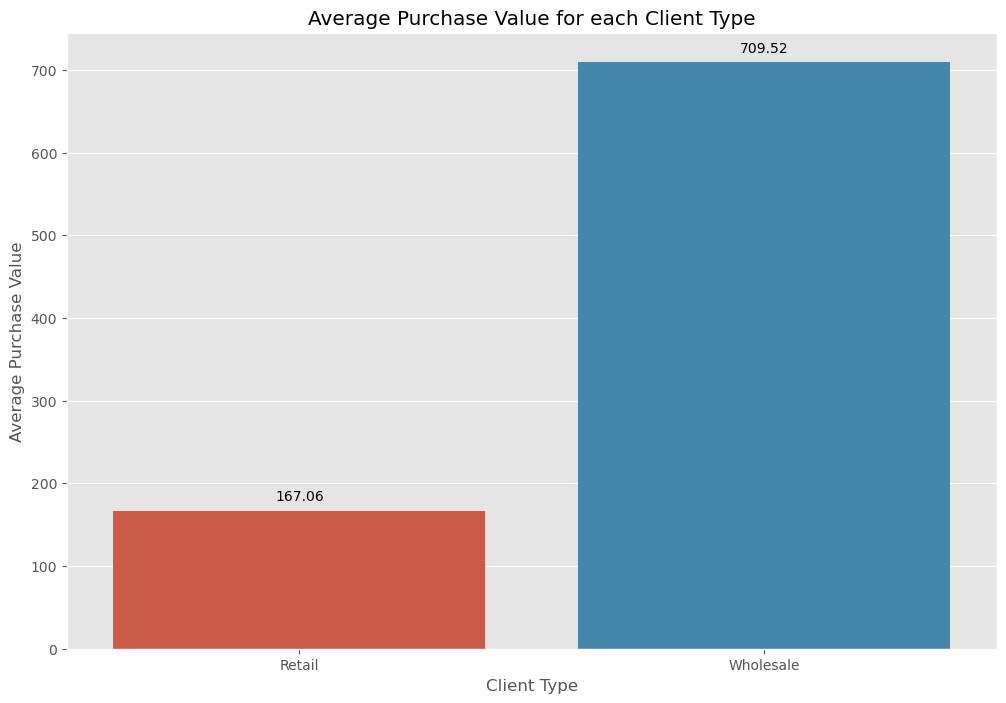

In [22]:
plot_barPlot(Avg_purchase_value_client_type,"client_type","total","Average Purchase Value for each Client Type","Client Type","Average Purchase Value")

### Observation

- Average Purchase Value for **Wholesale** Client type is the **highest**.


In [23]:
# Total purchase value by product line

total_product_line_total=(sales.groupby(["product_line"])[["total"]].sum().reset_index().sort_values('total'))
total_product_line_total

,product_line,total
4,Miscellaneous,27165.82
2,Engine,37945.38
0,Breaking system,38350.15
1,Electrical system,43612.71
3,Frame & body,69024.73
5,Suspension & traction,73014.21


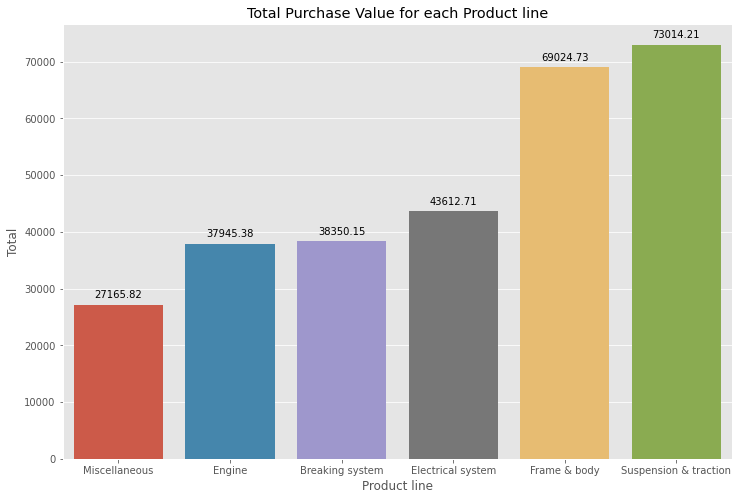

In [537]:
plot_barPlot(total_product_line_total,"product_line","total","Total Purchase Value for each Product line","Product line","Total")

### Observation

- Total Purchase Value for **Suspension & traction** product line is the **highest**.



In [24]:
# Average Total Value for every day of the week

Avg_Week_day_total=(sales.groupby(["Week_day"])[["total"]].mean().reset_index().sort_values('total'))
Avg_Week_day_total

,Week_day,total
4,Thursday,255.901667
6,Wednesday,271.681608
1,Monday,272.450080
2,Saturday,275.092378
0,Friday,290.009065
3,Sunday,309.412406
5,Tuesday,343.756835


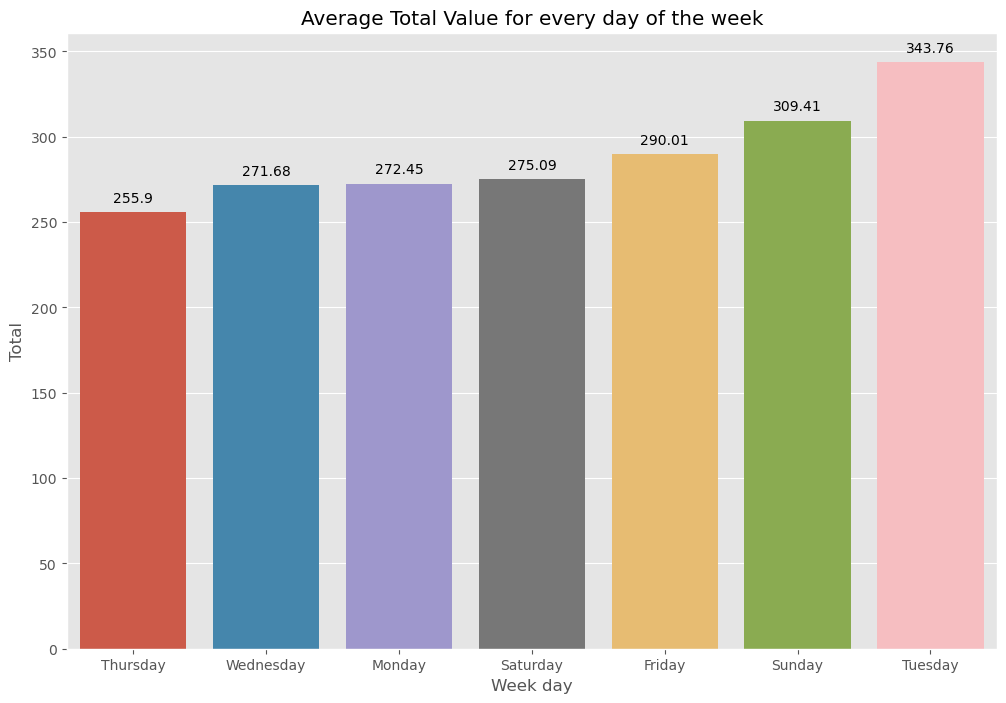

In [25]:
plot_barPlot(Avg_Week_day_total,"Week_day","total","Average Total Value for every day of the week","Week day","Total")

### Observation

- Total Purchase Value for **Tuesday** is the **highest**.



In [26]:
# Average Total Value for every Month

Avg_Month_total=(sales.groupby(["Month"])[["total"]].mean().reset_index().sort_values('total'))
Avg_Month_total

,Month,total
1,July,271.153362
2,June,282.011923
0,August,316.230473


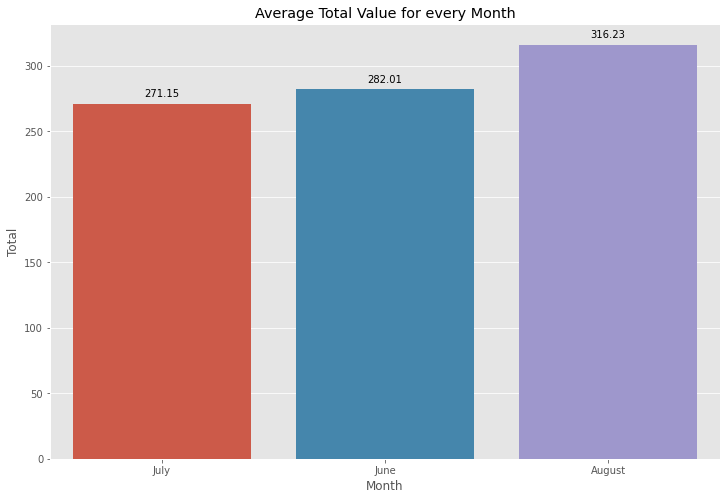

In [541]:
plot_barPlot(Avg_Month_total,"Month","total","Average Total Value for every Month","Month","Total")

In [27]:

# Total Sales Value for every Warehouse

Tota_Sales_Value_Warehouse=(sales.groupby(["warehouse"])[["total"]].sum().reset_index().sort_values('total'))
Tota_Sales_Value_Warehouse

,warehouse,total
2,West,46926.49
1,North,100203.63
0,Central,141982.88


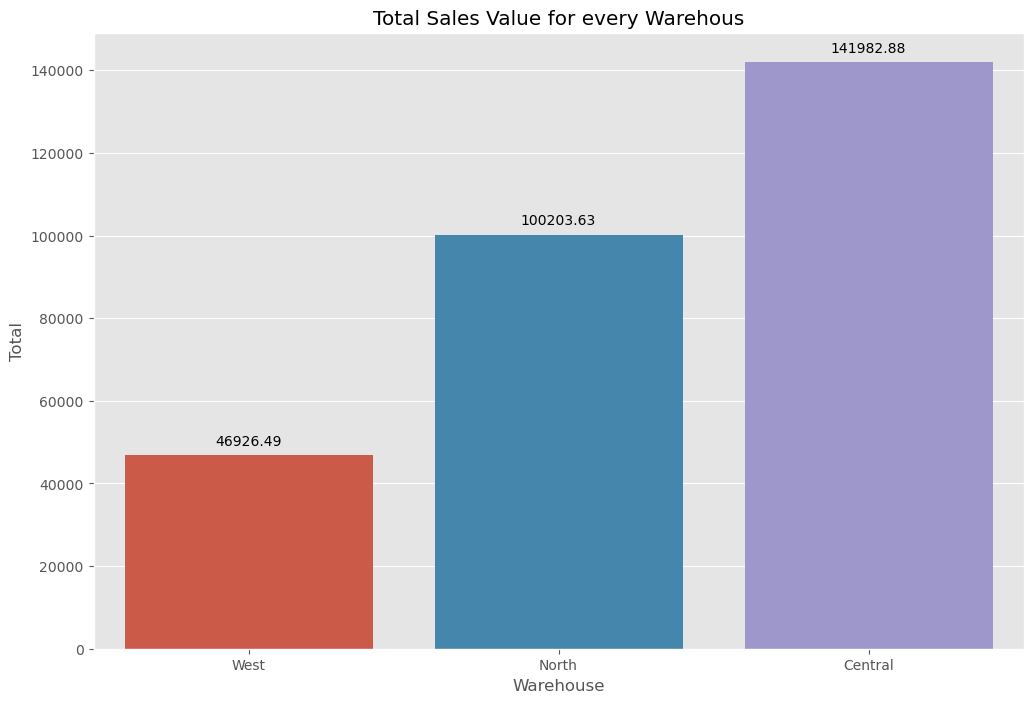

In [28]:
plot_barPlot(Tota_Sales_Value_Warehouse,"warehouse","total","Total Sales Value for every Warehous","Warehouse","Total")

### Observation

- Total Purchase Value for **August** is the **highest**.



In [29]:
# Average Total Value with Client type and Warehouse

warehouse_client_type_total=np.round(sales.pivot_table(columns=["warehouse"],index=["client_type"],values="total",aggfunc=np.mean),1)
warehouse_client_type_total

warehouse,Central,North,West
client_type,,,
Retail,170.2,160.2,171.7
Wholesale,723.5,754.1,582.5


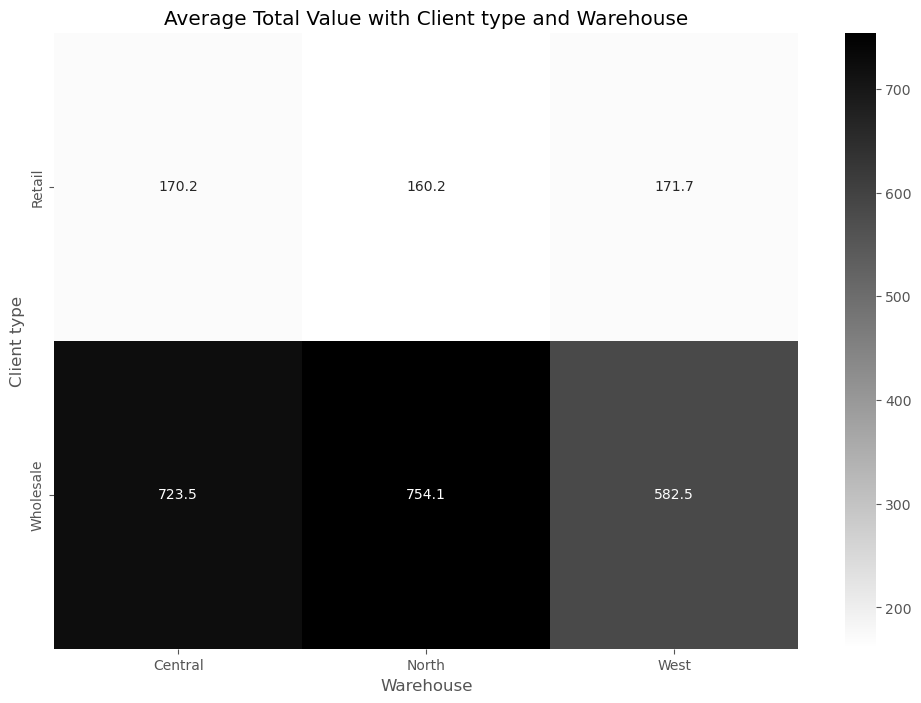

In [30]:
plot_heatmap(warehouse_client_type_total,"Warehouse","Client type","Average Total Value with Client type and Warehouse")

### Observation

- Average **highest and Lowest** Total Value are for **North** warehouse.


In [31]:
# Average Total Value with Payment Type and Warehouse

warehouse_payment_type_total=np.round(sales.pivot_table(columns=["warehouse"],index=["payment"],values="total",aggfunc=np.mean),1)
warehouse_payment_type_total

warehouse,Central,North,West
payment,,,
Cash,148.1,175.0,184.0
Credit card,173.5,157.3,169.2
Transfer,723.5,754.1,582.5


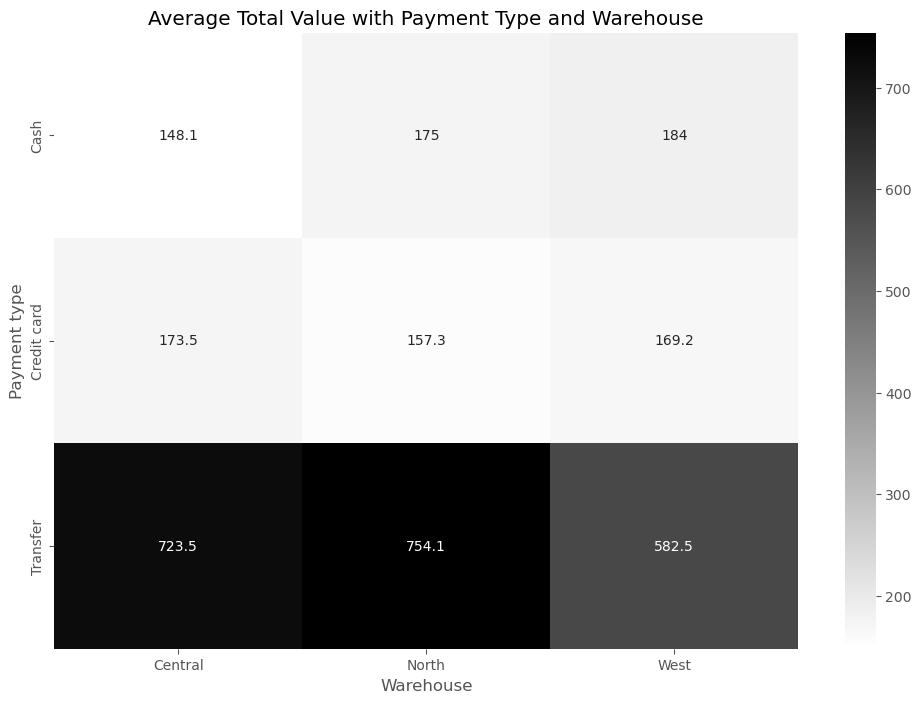

In [32]:
plot_heatmap(warehouse_payment_type_total,"Warehouse","Payment type","Average Total Value with Payment Type and Warehouse")

### Observation

- Average Total Value for payment type as **Transfer** is the **highest** for **North** warehouse
- Average Total value for payment type as **Cash** is the **lowest** which is coming from **Central** warehouse


In [33]:
# Average Total Value with Product line and Warehouse

warehouse_product_line_total=np.round(sales.pivot_table(columns=["warehouse"],index=["product_line"],values="total",aggfunc=np.mean),1)
warehouse_product_line_total

warehouse,Central,North,West
product_line,,,
Breaking system,158.9,149.1,212.1
Electrical system,241.7,231.0,177.0
Engine,757.3,452.3,382.8
Frame & body,385.1,481.3,365.0
Miscellaneous,210.7,226.8,243.3
Suspension & traction,311.2,334.6,309.9


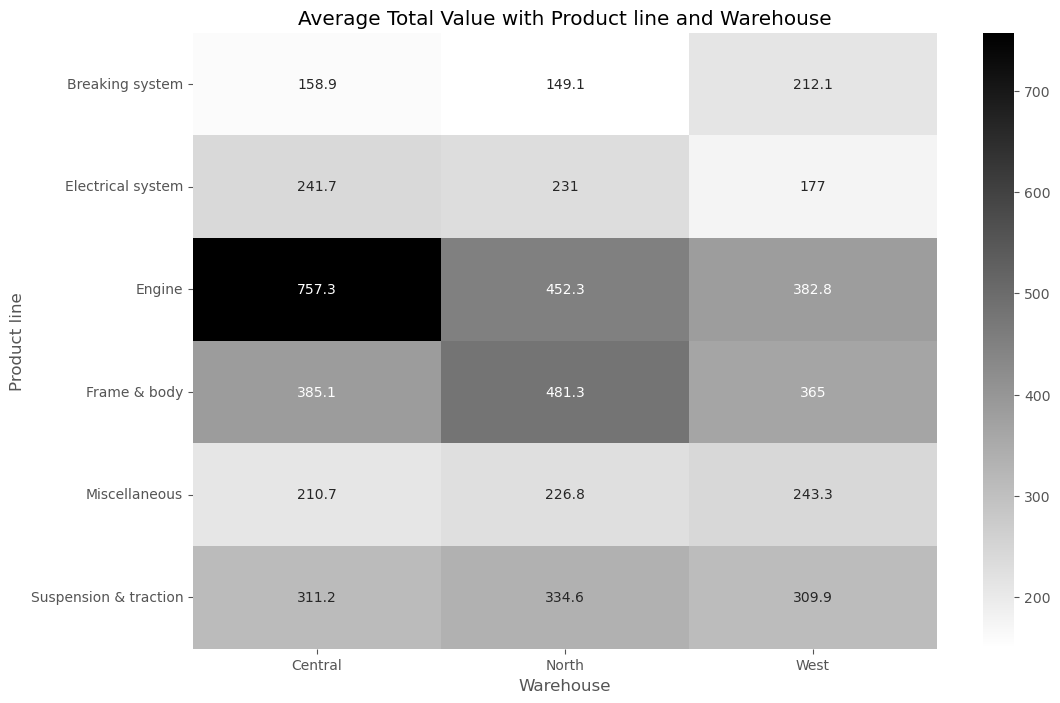

In [34]:
plot_heatmap(warehouse_product_line_total,"Warehouse","Product line","Average Total Value with Product line and Warehouse")

### Observation

- **Engine** Product line is brining in maximum Average Total Value for **Central** warehouse and among all other warehouses

In [35]:
# Average Total Value with day of the week and Warehouse

warehouse_Week_day_total=np.round(sales.pivot_table(columns=["warehouse"],index=["Week_day"],values="total",aggfunc=np.mean),1)
warehouse_Week_day_total

warehouse,Central,North,West
Week_day,,,
Friday,279.7,304.0,289.7
Monday,287.8,278.3,210.8
Saturday,248.7,326.2,260.7
Sunday,382.9,248.2,262.4
Thursday,242.1,283.3,242.6
Tuesday,385.9,312.0,292.6
Wednesday,255.9,313.6,247.6


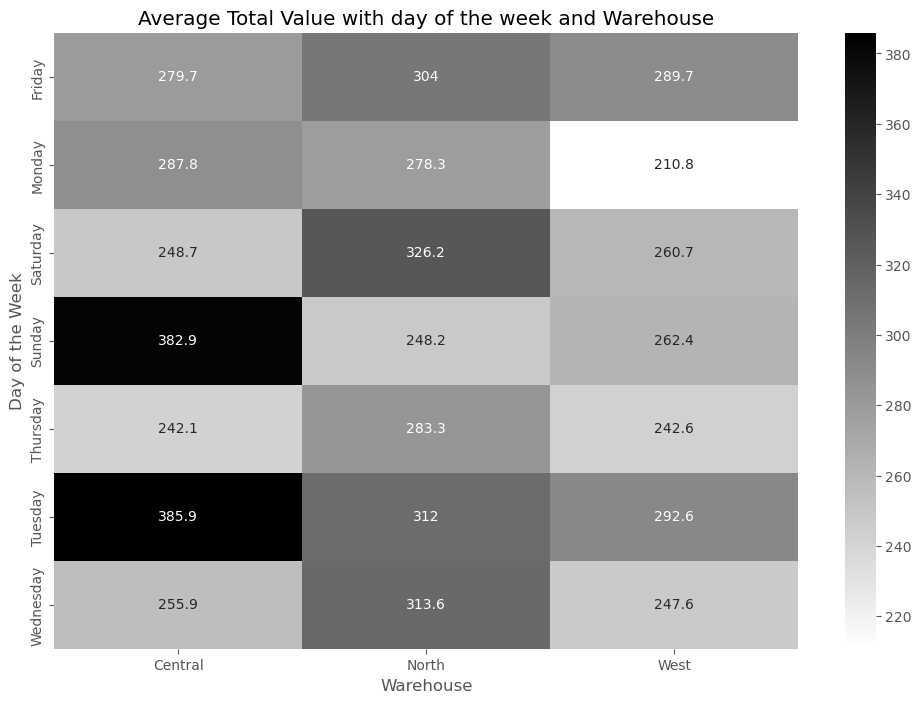

In [36]:
plot_heatmap(warehouse_Week_day_total,"Warehouse","Day of the Week","Average Total Value with day of the week and Warehouse")

### Observation

- **Sunday** and **Tuesday** are bringing in maximum Average Total Value for **Central** warehouse.

In [37]:
# Average Total Value with Month and Warehouse

warehouse_month_total=np.round(sales.pivot_table(columns=["warehouse"],index=["Month"],values="total",aggfunc=np.mean),1)
warehouse_month_total

warehouse,Central,North,West
Month,,,
August,344.3,312.1,248.0
July,269.7,282.7,256.4
June,281.1,287.2,275.0


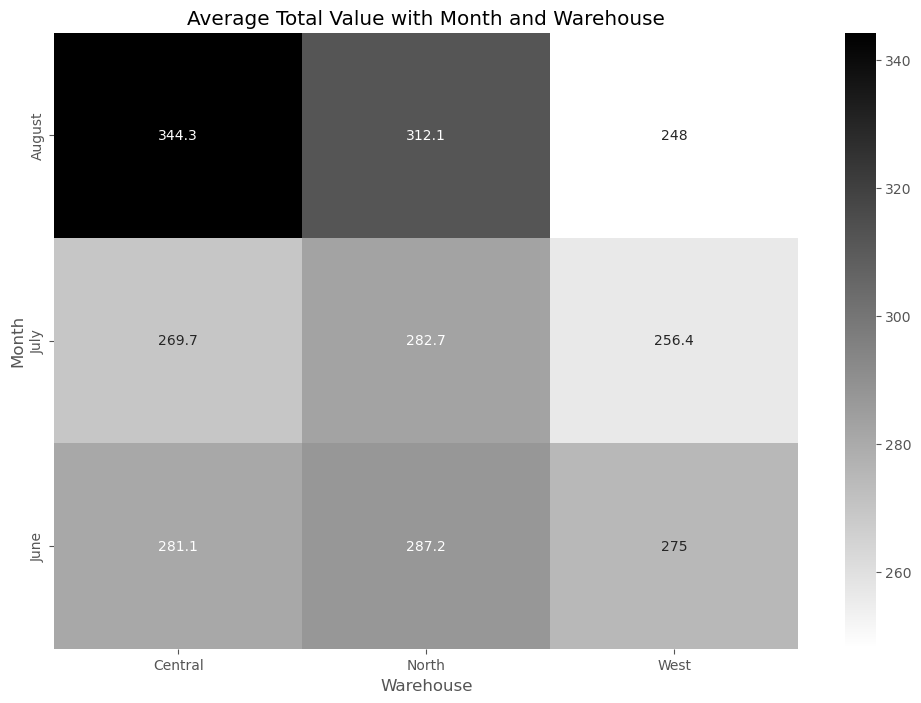

In [38]:
plot_heatmap(warehouse_month_total,"Warehouse","Month","Average Total Value with Month and Warehouse")

### Observation

- **August** month is having the **highest** Total Value which is coming from **Central** ware house.
- The same month **August** is having the **lowset** Total Value which is coming from **West** ware house.

In [39]:
# Average Total Value with Month and Product line

product_line_month_total=np.round(sales.pivot_table(columns=["product_line"],index=["Month"],values="total",aggfunc=np.mean),1)
product_line_month_total

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
Month,,,,,,
August,163.2,234.3,883.3,546.3,226.7,296.4
July,179.9,230.3,470.2,355.2,223.7,326.6
June,155.0,210.7,557.2,371.3,218.4,338.8


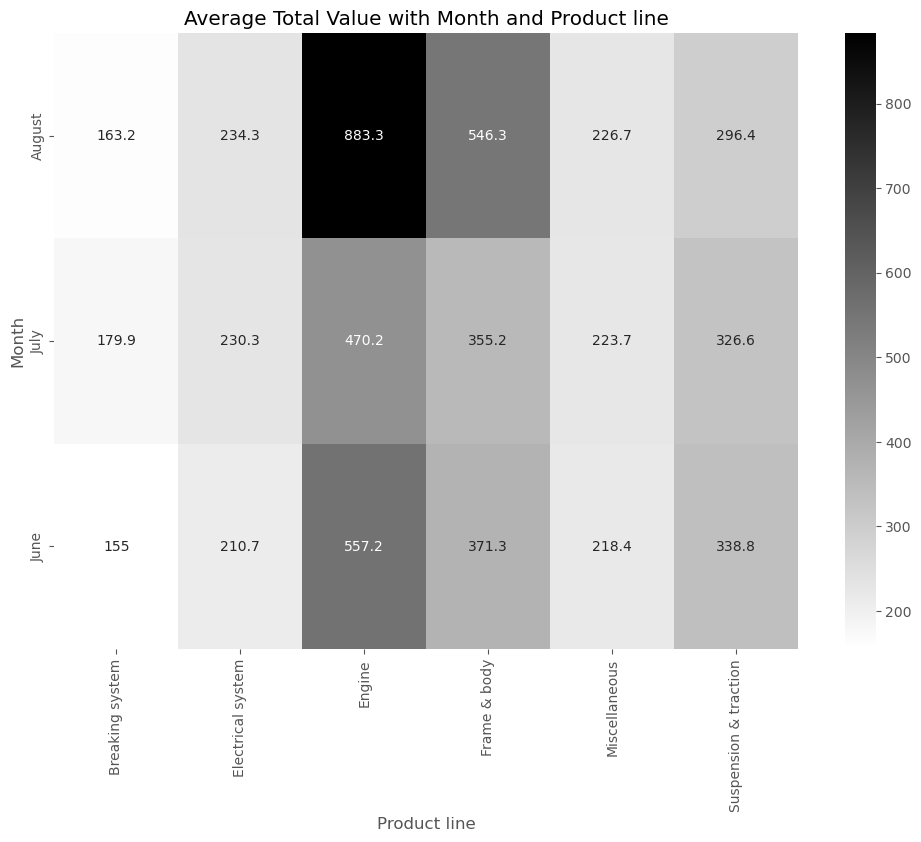

In [40]:
plot_heatmap(product_line_month_total,"Product line","Month","Average Total Value with Month and Product line")

In [41]:

## Average Quantity with Month and Product line

product_line_month_quantity=np.round(sales.pivot_table(columns=["product_line"],index=["Month"],values="quantity",aggfunc=np.mean),1)
product_line_month_quantity

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
Month,,,,,,
August,9.4,9.2,14.7,12.7,9.9,8.8
July,9.4,9.0,7.9,8.4,9.7,9.5
June,8.9,8.0,9.0,8.7,9.4,9.9


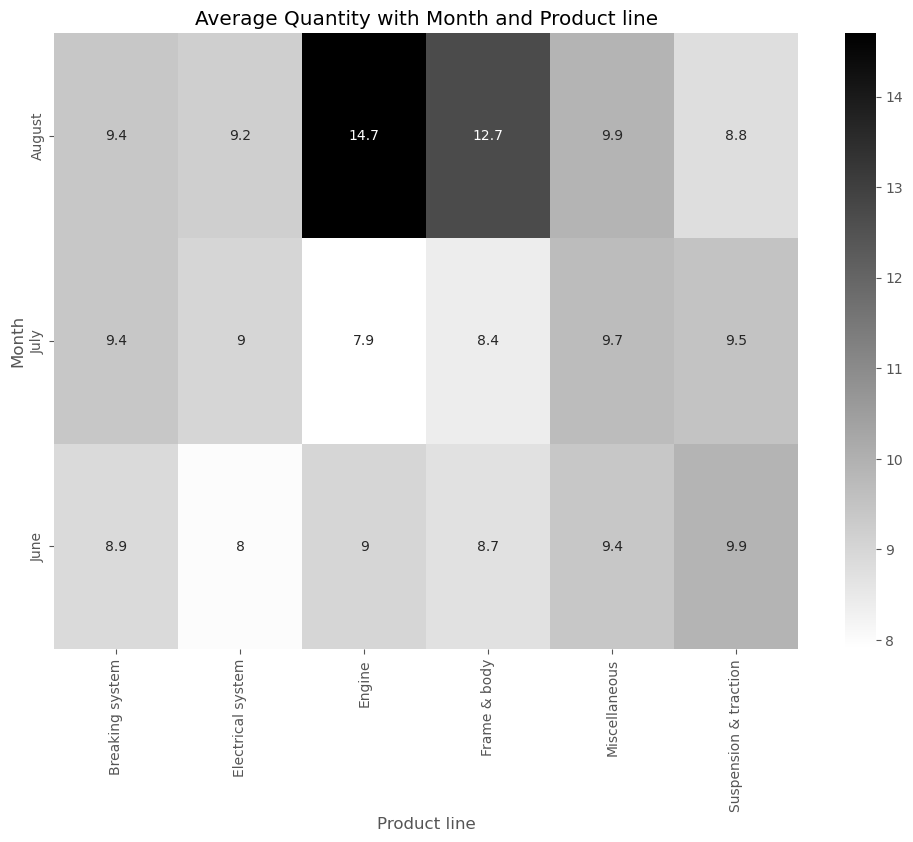

In [42]:
plot_heatmap(product_line_month_quantity,"Product line","Month","Average Quantity with Month and Product line")

### Observation

- Month of **August** is having maximum average **Engine** sales and the same product line is brining in the **highest** average **Total Sales** Values 

# Summary

**Based on the 3 months data**
- **Highest** Total Sales value is coming from Payment Type **Transfer** and **North** warehouse is major contriutor to it.
- **West** warehoust is consistently reporting the **Lowest** average **Total Sales value** through out 3 months.
- **Highest** average Total value is coming in the month of **August** with **Engine** product line having mximum contributor to it.
- **Suspension and Traction** is having highest **Total Purchase value**.
- **Central** warehouse is brining in the **Highest** Total value
